<a href="https://colab.research.google.com/github/IvanSalinas2000/Proyects/blob/main/PhishingDetection/ConRedNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto
#Deteccion de phising en URL
Ivan Gabriel Salinas Castillo 1856735


In [ ]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#Lectura de datos
df = pd.read_csv('/content/PhiUSIIL_Phishing_URL_Dataset.csv')
df

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,0,3,0,0,0,0


A continuacion se tienen las representaciones de las columnas en nuestro dataset

1. URL: La URL completa.
2. URLLength: La longitud de la URL en número de caracteres.
3. Domain: El dominio de la URL.
4. DomainLength: La longitud del dominio en número de caracteres.
5. IsDomainIP: Indica si el dominio es una dirección IP (1 = sí, 0 = no).
6. TLD: El dominio de nivel superior (Top-Level Domain) de la URL (por ejemplo, .com, .org).
7. URLSimilarityIndex: Un índice que mide la similitud de la URL con URLs conocidas.
8. CharContinuationRate: La tasa de continuación de caracteres en la URL.
9. TLDLegitimateProb: La probabilidad de que el TLD sea legítimo.
10. URLCharProb: La probabilidad de caracteres específicos en la URL.
11. TLDLength: La longitud del TLD en número de caracteres.
12. NoOfSubDomain: El número de subdominios en la URL.
13. HasObfuscation: Indica si la URL tiene ofuscación (1 = sí, 0 = no).
14. NoOfObfuscatedChar: El número de caracteres ofuscados en la URL.
15. ObfuscationRatio: La proporción de caracteres ofuscados en la URL.
16. NoOfLettersInURL: El número de letras en la URL.
17. LetterRatioInURL: La proporción de letras en la URL.
18. NoOfDegitsInURL: El número de dígitos en la URL.
19. DegitRatioInURL: La proporción de dígitos en la URL.
20. NoOfEqualsInURL: El número de signos de igualdad (=) en la URL.
21. NoOfQMarkInURL: El número de signos de interrogación (?) en la URL.
22. NoOfAmpersandInURL: El número de signos de ampersand (&) en la URL.
23. NoOfOtherSpecialCharsInURL: El número de otros caracteres especiales en la URL.
24. SpacialCharRatioInURL: La proporción de caracteres especiales en la URL.
25. IsHTTPS: Indica si la URL usa HTTPS (1 = sí, 0 = no).
26. LineOfCode: Número de líneas de código en la página web correspondiente a la URL.
27. LargestLineLength: La longitud de la línea más larga de código.
28. HasTitle: Indica si la página web tiene un título (1 = sí, 0 = no).
29. Title: El título de la página web.
30. DomainTitleMatchScore: Puntaje que mide la coincidencia entre el dominio y el título de la página.
31. URLTitleMatchScore: Puntaje que mide la coincidencia entre la URL y el título de la página.
32. HasFavicon: Indica si la página web tiene un favicon (1 = sí, 0 = no).
33. Robots: Indica si hay un archivo robots.txt (1 = sí, 0 = no).
34. IsResponsive: Indica si la página web es responsiva (1 = sí, 0 = no).
35. NoOfURLRedirect: El número de redirecciones URL.
36. NoOfSelfRedirect: El número de redirecciones internas.
37. HasDescription: Indica si la página web tiene una meta descripción (1 = sí, 0 = no).
38. NoOfPopup: El número de ventanas emergentes.
39. NoOfiFrame: El número de elementos iFrame.
40. HasExternalFormSubmit: Indica si la página web tiene un formulario que envía datos externamente (1 = sí, 0 = no).
41. HasSocialNet: Indica si la página web tiene enlaces a redes sociales (1 = sí, 0 = no).
42. HasSubmitButton: Indica si la página web tiene un botón de envío (1 = sí, 0 = no).
43. HasHiddenFields: Indica si la página web tiene campos ocultos (1 = sí, 0 = no).
44. HasPasswordField: Indica si la página web tiene un campo de contraseña (1 = sí, 0 = no).
45. Bank: Indica si la URL está relacionada con banca (1 = sí, 0 = no).
46. Pay: Indica si la URL está relacionada con pagos (1 = sí, 0 = no).
47. Crypto: Indica si la URL está relacionada con criptomonedas (1 = sí, 0 = no).
48. HasCopyrightInfo: Indica si la página web tiene información de derechos de autor (1 = sí, 0 = no).
49. NoOfImage: El número de imágenes en la página web.
50. NoOfCSS: El número de hojas de estilo CSS en la página web.
51. NoOfJS: El número de archivos JavaScript en la página web.
52. NoOfSelfRef: El número de referencias internas.
53. NoOfEmptyRef: El número de referencias vacías.
54. NoOfExternalRef: El número de referencias externas.
55. label: La etiqueta de la URL (1 = phishing, 0 = legítima).

In [ ]:
# Contar valores distintos en la columna 'label' (legítimo vs phishing)
df['label'].value_counts()

,count
label,
1,134850
0,100945


In [ ]:
#Cantidad de filas totales (observaciones)
len(df)

235795

In [ ]:
#Pre procesamiento de datos

#Primero la variable TLD le daremos valores numericos
df['TLD'].value_counts()
#Podemos observar que son en total 695 categorias


,count
TLD,
com,112554
org,18793
net,7097
app,6508
uk,6395
...,...
47,1
sharp,1
faith,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear el LabelEncoder
label_encoder = LabelEncoder()
# Ajustar el LabelEncoder a la columna y transformarla
df['TLD_encoded'] = label_encoder.fit_transform(df['TLD'])
df
#Hemos creado una columna llamada TLD_enconded donde se tendran valores numericos para cada categoria

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,TLD_encoded
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,0.061933,...,0,1,34,20,28,119,0,124,1,231
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,0.050207,...,0,1,50,9,8,39,0,217,1,254
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,0.064129,...,0,1,10,2,7,42,2,5,1,647
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,0.057606,...,1,1,3,27,15,22,1,31,1,231
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,0.059441,...,0,1,244,15,34,72,1,85,1,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,0.058739,...,0,1,51,7,21,187,2,191,1,231
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,0.053834,...,0,0,50,1,7,88,0,31,1,647
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,0.063093,...,0,1,27,10,30,58,2,67,1,157
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,0.050211,...,0,0,0,0,3,0,0,0,0,258


In [ ]:
#Debido a que el analisis deseado se centrara en el uso de las variables que
#tengan relacion unicamente con el URL de las paginas se quitaran las demas
# variables que describen otras caracteristicas
#Por dar un ejemplo la variable NoOfImage cuenta la cantidad de imagenes en la
#pagina entonces no tiene relacion con el URL
URL_features= df[['URLLength', 'DomainLength', 'IsDomainIP',
       'CharContinuationRate','TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'label','TLD_encoded']]
URL_features

,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,...,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,label,TLD_encoded
0,31,24,0,1.000000,3,1,0,0,0.0,18,...,0,0.000,0,0,0,1,0.032,1,1,231
1,23,16,0,0.666667,2,1,0,0,0.0,9,...,0,0.000,0,0,0,2,0.087,1,1,254
2,29,22,0,0.866667,2,2,0,0,0.0,15,...,0,0.000,0,0,0,2,0.069,1,1,647
3,26,19,0,1.000000,3,1,0,0,0.0,13,...,0,0.000,0,0,0,1,0.038,1,1,231
4,33,26,0,1.000000,3,1,0,0,0.0,20,...,0,0.000,0,0,0,1,0.030,1,1,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,1.000000,3,1,0,0,0.0,16,...,0,0.000,0,0,0,1,0.034,1,1,231
235791,28,21,0,0.785714,2,2,0,0,0.0,14,...,0,0.000,0,0,0,2,0.071,1,1,647
235792,30,23,0,1.000000,2,1,0,0,0.0,17,...,0,0.000,0,0,0,1,0.033,1,1,157
235793,55,47,0,0.465116,3,2,0,0,0.0,39,...,3,0.055,0,0,0,5,0.091,1,0,258


In [ ]:
#Estadisticas descriptivas
URL_features.describe()

,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,...,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,label,TLD_encoded
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,0.845508,2.764456,1.164758,0.002057,0.024861,0.000138,19.428919,...,1.881011,0.028616,0.062241,0.029403,0.025056,2.340198,0.063309,0.782625,0.571895,319.494234
std,41.314153,9.150793,0.051946,0.216632,0.599739,0.600969,0.045306,1.876249,0.003817,29.090330,...,11.886695,0.070897,0.934704,0.193505,0.836448,3.527603,0.032393,0.412461,0.494805,144.660289
min,13.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,0.680000,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,0.000000,231.000000
50%,27.000000,20.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,1.000000,231.000000
75%,34.000000,24.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.083000,1.000000,1.000000,443.000000
max,6097.000000,110.000000,1.000000,1.000000,13.000000,10.000000,1.000000,447.000000,0.348000,5191.000000,...,2011.000000,0.684000,176.000000,4.000000,149.000000,499.000000,0.397000,1.000000,1.000000,694.000000


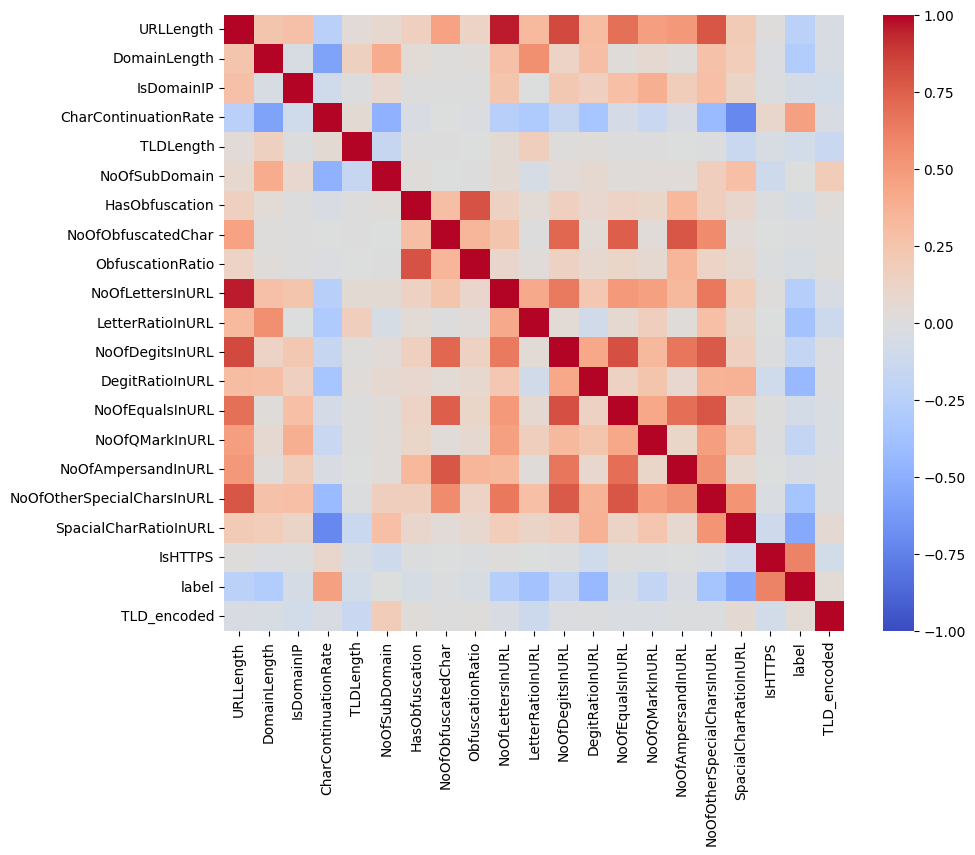

In [ ]:
import seaborn as sns

corr_matrix= URL_features.corr()
corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [ ]:
# Establecer el umbral
umbral = 0.8

# Encontrar pares de columnas con correlación mayor al umbral
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > umbral:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_correlation_pairs.append((colname1, colname2, correlation_value))

# Imprimir los pares de columnas con alta correlación
for pair in high_correlation_pairs:
    print(f"{pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f}")


NoOfLettersInURL y URLLength tienen una correlación de 0.96
NoOfDegitsInURL y URLLength tienen una correlación de 0.84
NoOfEqualsInURL y NoOfDegitsInURL tienen una correlación de 0.81


In [ ]:
URL_features= df[['DomainLength', 'IsDomainIP',
       'CharContinuationRate','TLDLength', 'NoOfSubDomain', 'HasObfuscation',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
        'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
       'label','TLD_encoded']]

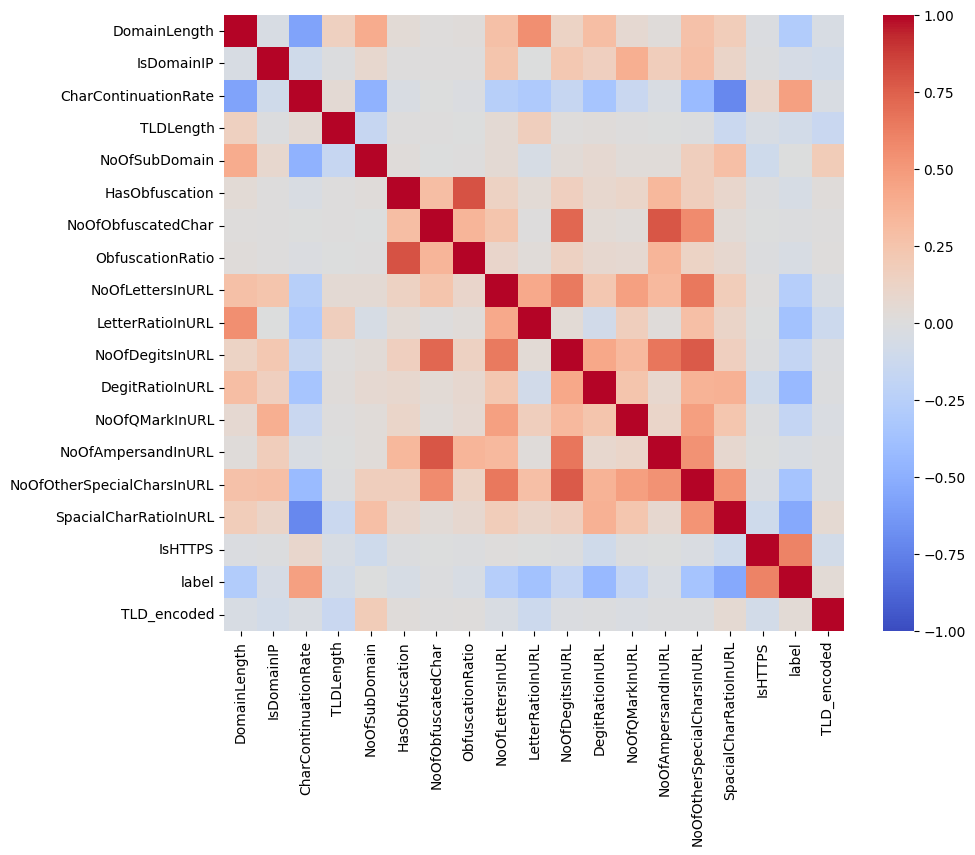

In [ ]:
import seaborn as sns

corr_matrix= URL_features.corr()
corr_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [ ]:
# Establecer el umbral
umbral = 0.8

# Encontrar pares de columnas con correlación mayor al umbral
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > umbral:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_correlation_pairs.append((colname1, colname2, correlation_value))

# Verificar si se encontraron pares con alta correlación
if high_correlation_pairs:
    # Imprimir los pares de columnas con alta correlación
    for pair in high_correlation_pairs:
        print(f"{pair[0]} y {pair[1]} tienen una correlación de {pair[2]:.2f}")
else:
    print("No hay correlaciones mayores a 0.8")

No hay correlaciones mayores a 0.8


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Separar características y etiquetas
X = URL_features.drop('label', axis=1)
y = URL_features['label']

# Paso 1: Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Paso 2: Aplicar PCA
pca = PCA(n_components=8)  # Selecciona el número de componentes deseado
X_pca = pca.fit_transform(X_scaled)

# Imprimir la varianza explicada por cada componente y la varianza total
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)
print("Varianza explicada acumulada:", explained_variance.cumsum())

Varianza explicada por cada componente principal: [0.2467369  0.13877623 0.09574825 0.08856832 0.07223716 0.05957874
 0.0552748  0.04898488]
Varianza explicada acumulada: [0.2467369  0.38551314 0.48126138 0.5698297  0.64206686 0.7016456
 0.7569204  0.80590528]


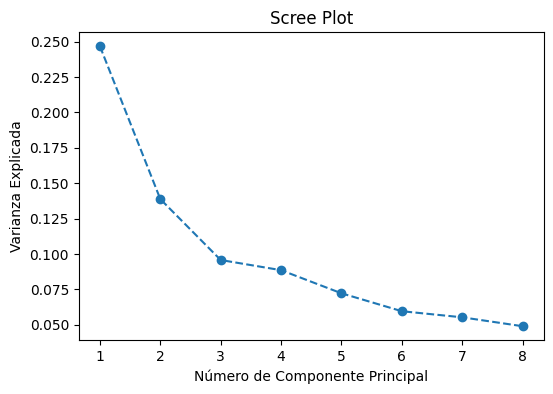

In [ ]:
# Paso 3: Hacer el Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.show()

In [ ]:
# Paso 4: Construir la red neuronal
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=12, batch_size=32, validation_split=0.2)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4716/4716 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9545 - loss: 0.1329 - val_accuracy: 0.9941 - val_loss: 0.0240
Epoch 2/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9928 - loss: 0.0328 - val_accuracy: 0.9953 - val_loss: 0.0200
Epoch 3/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9942 - loss: 0.0273 - val_accuracy: 0.9960 - val_loss: 0.0187
Epoch 4/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9951 - loss: 0.0242 - val_accuracy: 0.9959 - val_loss: 0.0186
Epoch 5/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9950 - loss: 0.0245 - val_accuracy: 0.9964 - val_loss: 0.0177
Epoch 6/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9953 - loss: 0.0230 - val_accuracy: 0.9965 - val_loss: 0.0166
Epoch 7/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9952 - loss: 0.0228 - val_accuracy: 0.9965 - val_loss: 0.0162
Epoch 8/12
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9954 - loss: 0.0226 - val

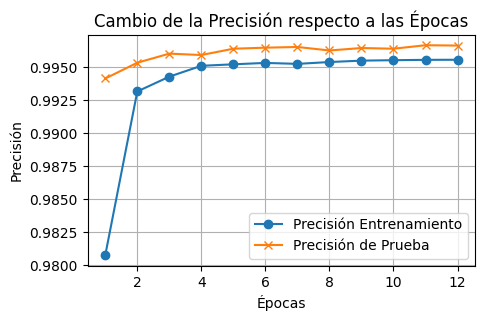

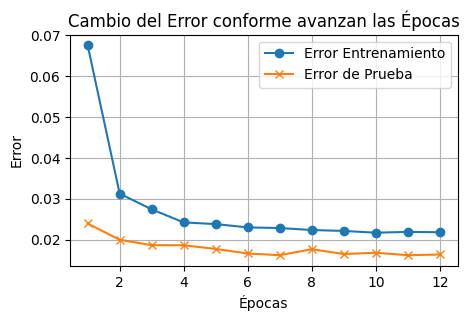

In [ ]:
# Gráfica de cambio de la precisión respecto a las épocas
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(5, 3))
plt.plot(epochs, history.history['accuracy'], label='Precisión Entrenamiento', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Precisión de Prueba', marker='x')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Cambio de la Precisión respecto a las Épocas')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de cambio del error conforme avanzan las épocas
plt.figure(figsize=(5, 3))
plt.plot(epochs, history.history['loss'], label='Error Entrenamiento', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Error de Prueba', marker='x')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Cambio del Error conforme avanzan las Épocas')
plt.legend()
plt.grid(True)
plt.show()


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Precisión: 99.68%


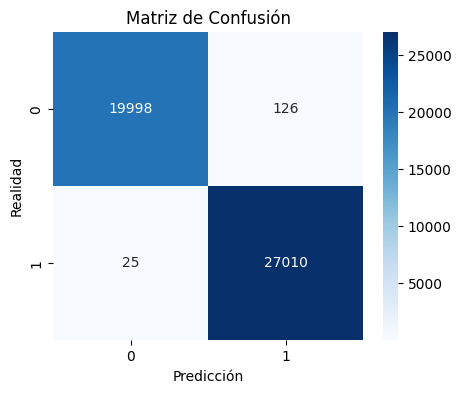

In [ ]:
# Paso 5: Evaluar el modelo con una matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Precisión: {accuracy * 100:.2f}%")

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()
